# Úkoly

## SciPy Special

In [66]:
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt

1. Výpočet Eulerovy konstanty:

- spočtěte Eulerovu konstantu $\gamma$ pomocí funkce `digamma` z modulu `scipy.special`
    - Eulerova konstanta se dá spočítat jako $\gamma = -\psi(1)$, kde $\psi$ je digamma funkce
- porovnejte výsledek s definicí Eulerovy konstanty (pro $n = 100, 1000, ...$) $$\gamma = \lim_{n \to \infty} \left(- \ln(n) + \sum_{k=1}^n \frac{1}{k} \right)$$

In [67]:
def euler(n):
    sum = 0
    for i in range(1, n + 1):
        sum += 1 / i

    y = -np.log(n) + sum
    return y


y = euler(100)
y_digamma = -special.digamma(1)
print(y, y_digamma)

y = euler(1000)
y_digamma = -special.digamma(1)
print(y, y_digamma)

y = euler(10000)
y_digamma = -special.digamma(1)
print(y, y_digamma)

0.5822073316515288 0.5772156649015329
0.5777155815682065 0.5772156649015329
0.5772656640681646 0.5772156649015329


2. Vykreslete Beta funci na intervalu $[1, 2]\times[1, 2]$ 

In [68]:
from mpl_toolkits.mplot3d import Axes3D

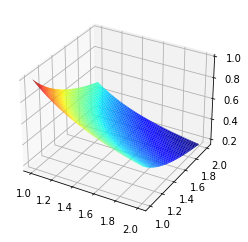

In [69]:
x = np.linspace(1, 2, 100)
y = np.linspace(1, 2, 100)
X, Y = np.meshgrid(x, y)

Z = special.beta(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, Z, cmap="jet")

plt.show()

## SciPy Sparse

In [70]:
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import numpy as np
import matplotlib.pyplot as plt

1. Sestavení řídkých matic. Sestavte sparse matici `A` ve formátu CSR. Representující následující matici:
```
[[1 1 0 0]
 [1 3 1 0]
 [0 1 5 1]
 [0 0 1 7]]
 ```
- Použijte sestavení pomocí seznamu indexů a hodnot.


In [71]:
data = np.array([1, 1, 1, 3, 1, 1, 5, 1, 1, 7])
row_indices = np.array([0, 0, 1, 1, 1, 2, 2, 2, 3, 3])
col_indices = np.array([0, 1, 0, 1, 2, 1, 2, 3, 2, 3])

A = sparse.csr_matrix((data, (row_indices, col_indices)), dtype="float")

print(A.indices)
print(A.data)
print(A.indptr)

print("-----------")
print(A.todense())

[0 1 0 1 2 1 2 3 2 3]
[1. 1. 1. 3. 1. 1. 5. 1. 1. 7.]
[ 0  2  5  8 10]
-----------
[[1. 1. 0. 0.]
 [1. 3. 1. 0.]
 [0. 1. 5. 1.]
 [0. 0. 1. 7.]]


2. Řešení série soustav lineárních rovnic se stejnou maticí `A` a různými pravými stranami `b`:
- sestavte LU faktorizaci matice `A`
- řešte soustavu rovnic pro pravé strany `b1 = [1, 2, 3, 4]` a `b2 = [4, 3, 2, 1]` pomocí spočtené LU faktorizace


/tmp/ipykernel_5653/455920522.py:4: SparseEfficiencyWarning: splu converted its input to CSC format
  lu_decomp = sla.splu(A)


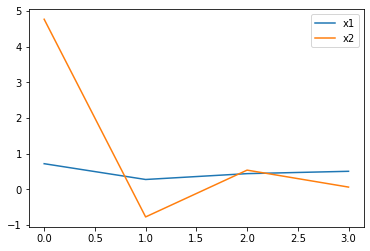

In [72]:
b1 = np.array([1, 2, 3, 4])
b2 = np.array([4, 3, 2, 1])

lu_decomp = sla.splu(A)

x1 = lu_decomp.solve(b1)
x2 = lu_decomp.solve(b2)

plt.plot(x1, label="x1")
plt.plot(x2, label="x2")

plt.legend()
plt.show()


3. Spektrální rozklad:
- Spočítejte největší vlastní číslo a příslušný vlastní vektor matice A z úlohy 1.

In [73]:
w, v = sla.eigs(A, k=1)

print(f"Eigenvalue: {w}")
print(f"Eigenvector: {v}")


Eigenvalue: [7.45084438+0.j]
Eigenvector: [[-0.01476242+0.j]
 [-0.09523007+0.j]
 [-0.40909182+0.j]
 [-0.90739032+0.j]]


## SciPy FFTpack

In [74]:
from IPython.display import Audio
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

fs, signal = sp.io.wavfile.read('butterfly_noise.wav')
signal = signal / np.max(np.abs(signal))
Audio(data=signal, rate=fs)

1. Pokuste se odstranit šum z nahrávky pomocí Fourierovy transformace:
- spočtěte Fourierovu transformaci nahrávky (`fft`)
- vykreslete si amplitudové spektrum (`abs` výsledku předchozího bodu) a zhodnoťte hranici mezi šumem a signálem
- odstraňte šum z amplitudového spektra a spočtěte inverzní Fourierovu transformaci (`ifft`)
- přehrajte si reálnou složku výsledku `Audio(data=np.real(filtered_signal), rate=fs)`

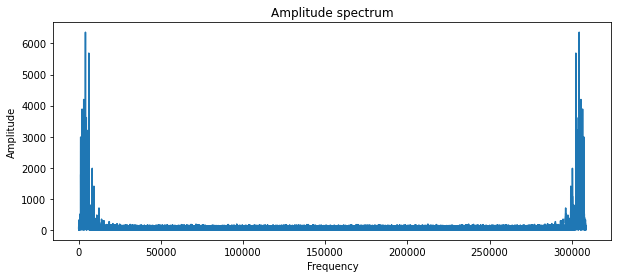

In [75]:
signal_fft = fftpack.fft(signal)

frequencies = fftpack.fftfreq(len(signal), fs)

plt.figure(figsize=(10, 4))
plt.plot(np.abs(signal_fft))
plt.title('Amplitude spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

mask = np.abs(signal_fft) > 200

filtered_fft = signal_fft * mask

filtered_signal = np.real(fftpack.ifft(filtered_fft))

Audio(data=filtered_signal, rate=fs)


## SciPy Optimize

In [76]:
import scipy.optimize as opt

1. Nalezněte globální maximum funkce $$f(x) = \exp(-x^2) - 1.1 \cdot \exp(-(x-2)^2)$$

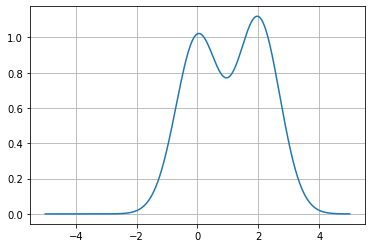

In [77]:
x = np.linspace(-5, 5, 1000)
y = np.exp(-x**2) + 1.1*np.exp(-(x-2)**2)
plt.plot(x, y)
plt.grid()

In [78]:
def f(x):
    return -(np.exp(-x**2) + 1.1*np.exp(-(x-2)**2))

x_max = opt.minimize(f, x0 = 2)

print(f"Global maximum at {x_max.x}, value is {-f(x_max.x)}")

Global maximum at [1.96196148], value is [1.11970432]


2. Nalezněte všechny kořeny funkce $f(x) = 7.875 \cdot x^5 - 8.75 \cdot x^3 + 1.875 \cdot x$ na intervalu $[-1, 1]$.

In [79]:
def f(x): return 7.875 * x**5 - 8.75 * x**3 + 1.875 * x

interval = (-1.0, 1.0)

result = opt.root_scalar(f, bracket=interval)

print(f"Root at {result.root}, value is {f(result.root)}")

Root at 0.0, value is 0.0


## SciPy Interpolate

In [80]:
import scipy.interpolate as spi

1. Spočtěte lineární a kubickou interpolaci bodů $(0, 0), (1, 1), (2, 0), (3, 1)$ na intervalu $[0, 3]$ a vše vykreslete.

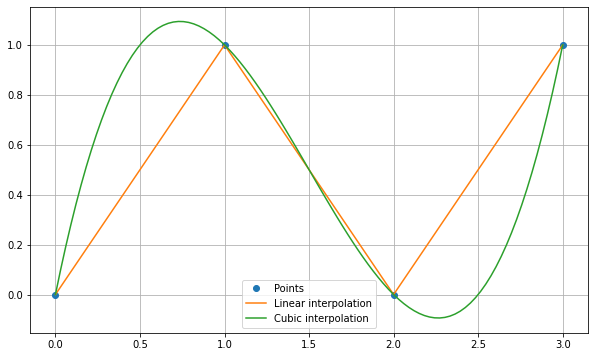

In [81]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])

x_interval = np.linspace(0, 3, 100)

linear_interp = spi.interp1d(x, y)
y_linear = linear_interp(x_interval)

cubic_interp = spi.interp1d(x, y, kind='cubic')
y_cubic = cubic_interp(x_interval)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Points')
plt.plot(x_interval, y_linear, label='Linear interpolation')
plt.plot(x_interval, y_cubic, label='Cubic interpolation')
plt.legend()
plt.grid(True)
plt.show()


2. Pro stejné body spočtěte aproximaci polynomem stupně 2 a vykreslete.

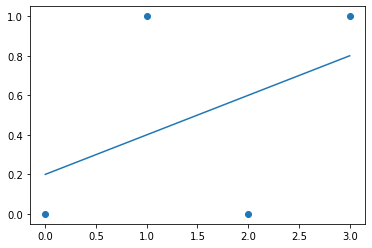

In [82]:
coefficients = np.polyfit(x, y, 2)

p = np.poly1d(coefficients)

plt.scatter(x, y)
plt.plot(x, p(x))
plt.show()

## SciPy Integrate

In [83]:
import scipy.integrate as spi

1. Spočtěte integrál funkce $f(x) = x^2$ na intervalu $[1, 2]$ pomocí funkce `quad`.

In [84]:
val, abserr = spi.quad(lambda x: x**2, 1, 2)
print(f"result = {val} ± {abserr}")

result = 2.3333333333333335 ± 2.590520390792032e-14


2. Spočtěte integrál funkce $f(x) = \exp(-x)$ na intervalu $[0, \infty]$ pomocí funkce `quad`.

In [85]:
val, abserr = spi.quad(lambda x: np.exp(-x), 0, np.inf)
print(f"výsledek = {val} ± {abserr}")

výsledek = 1.0000000000000002 ± 5.842606742906004e-11


3. Spočtěte průběh radioaktivního rozpadu:
- rychlost úbytku radioaktivní látky (její hmotnosti) je úměrná aktuální hmotnosti látky $$m'(t) = -\lambda m(t)$$
    - kde $\lambda$ je konstanta pocházející z poločasu rozpadu
- spočtěte hmotnost látky v čase $t \in [0, 100]$ pro $m(0) = 1$ a $\lambda = 0.1$ pomocí funkce `odeint`

In [86]:
def f_radioactive(m, t, λ):
    return -λ * m

m0 = 1
λ = 0.1
t = np.linspace(0, 100, 100)

x = spi.odeint(f_radioactive, m0, t, args=(λ, ))

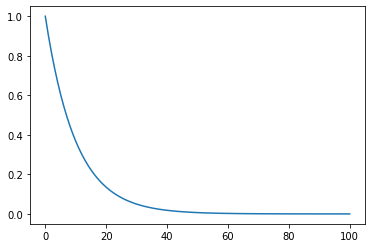

In [87]:
plt.plot(t, x)
plt.show()